In [1]:
%run ../../multibench.py

In [2]:
%%bash
alias cobs=/home/manzik/Documents/cmdbench/repo/bioinformatics/cobs/basic-test/cobs/build/src/cobs

In [3]:
import sys
import os
import shutil
import numpy as np
import glob
from shutil import copyfile

# Move two upper directories, import benchmark, revert cwd
sys.path.append("../..")
import cmdbench

# Summarize numpy array if it has more than 10 elements
np.set_printoptions(threshold=10)

def clean_if_exists(path):
    if os.path.exists(path):
        if(os.path.isfile(path)):
            os.remove(path)
        else:
            shutil.rmtree(path)
            os.mkdir(path)
def get_last_n_lines(string, n):
    return "\n".join(string.split("\n")[-n:])
def create_folder_if_doesnt_exist(path):
    if not os.path.exists(path):
        os.makedirs(path)


In [4]:
input_samples = [os.path.basename(f) for f in glob.glob('input/*_1.fastq.gz')]
input_samples = [f.replace('_1.fastq.gz','') for f in input_samples]
print(input_samples)

['2014C-3599', '2014C-3656', '2014C-3840', '2014C-3655', '2014C-3598', '2014C-3850', '2014C-3857', '2014C-3907', '2014C-3600']


In [5]:
sample_sizes = list(range(1, 16 + 1))
sample_sizes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [6]:
create_folder_if_doesnt_exist("cobs-data")
create_folder_if_doesnt_exist("cobs-data/samples")

In [7]:
def reset_func():
    clean_if_exists("cobs-data/samples/")
    clean_if_exists("example.cobs_compact")
    pass
    
def benchmark_list_to_results(benchmark_firsts_list):
    return {
        "memory": max(list(map(lambda result: result.memory.max, benchmark_firsts_list))),
        "disk_read": max(list(map(lambda result: result.disk.read_chars, benchmark_firsts_list))),
        "disk_write": max(list(map(lambda result: result.disk.write_chars, benchmark_firsts_list))),
        "runtime": sum(list(map(lambda result: result.process.execution_time, benchmark_firsts_list)))
    }

def sampling_func(sample_size):
    # Copy files we want to be part of the sample
    # from inputs to cobs-data/samples/ and return their path
    samples = input_samples[:sample_size]
    samples_out = []
    for sample in samples:
        infile1, infile2 = "input/%s_1.fastq.gz" % sample, "input/%s_2.fastq.gz" % sample
        outfile1, outfile2 = "cobs-data/samples/%s_1.fastq.gz" % sample, "cobs-data/samples/%s_2.fastq.gz" % sample
        copyfile(infile1, outfile1)
        copyfile(infile2, outfile2)
    return ["cobs-data/samples/"]

build_command = {
    "command": "cobs/build/src/cobs compact-construct % cobs-data/example.cobs_compact",
    "parallel_args": "-j 1 -I%"
}

query_repeat_count = 2
query_sequence = "GAAGAAGATGGTGTACGCGGTGCGCGCCGCTATCTCGACCACCTTAAAATGGAATATGCCTTCTGGATGGACG"

query_command = {
    "command": "cobs/build/src/cobs query -i cobs-data/example.cobs_compact %",
    "argfiles": [query_sequence] * query_repeat_count,
    "parallel_args": "-j 1 -I%"
}

multibench_results, debug_str = multi_cmdbench({
"index": [build_command],
"query": [query_command]
}, reset_func = reset_func, iterations = 100, sampling_func = sampling_func, sample_sizes = sample_sizes, 
    benchmark_list_to_results=benchmark_list_to_results)


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 15, 3

[{'memory': 27873976.32, 'disk_read': 2287449.9, 'disk_write': 483847.07, 'runtime': 0.14590000000000017}, {'memory': 27921121.28, 'disk_read': 2485251.43, 'disk_write': 490320.6, 'runtime': 0.14530000000000012}, {'memory': 28084101.12, 'disk_read': 2690200.14, 'disk_write': 494045.62, 'runtime': 0.1448000000000002}, {'memory': 28260515.84, 'disk_read': 2917328.36, 'disk_write': 498040.58, 'runtime': 0.1464000000000002}, {'memory': 28119941.12, 'disk_read': 3277430.94, 'disk_write': 505272.9, 'runtime': 0.1472000000000002}, {'memory': 28150210.56, 'disk_read': 3501424.26, 'disk_write': 507625.13, 'runtime': 0.14840000000000014}, {'memory': 27988295.68, 'disk_read': 3721450.27, 'disk_write': 512599.6, 'runtime': 0.1492000000000001}, {'memory': 28257443.84, 'disk_read': 3954074.32, 'disk_write': 512298.42, 'runtime': 0.14760000000000023}, {'memory': 28162252.8, 'disk_read': 4265391.59, 'disk_write': 517786.16, 'runtime': 0.14990000000000017}, {'memory': 28332933.12, 'disk_read': 4289180.

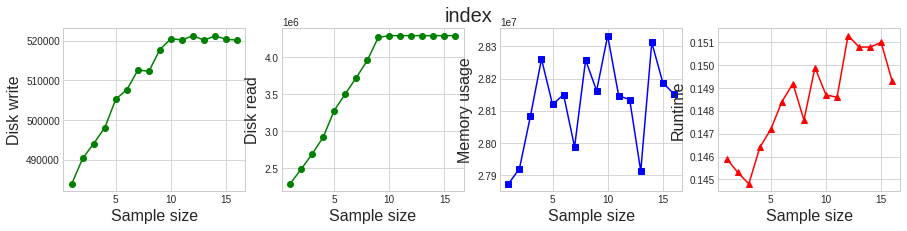

In [9]:
# Indexing Plots
plot_resources(multibench_results, sample_sizes, "index")

[{'memory': 27820523.52, 'disk_read': 1970353.49, 'disk_write': 142442.86, 'runtime': 0.07710000000000006}, {'memory': 28108103.68, 'disk_read': 1970355.32, 'disk_write': 141956.02, 'runtime': 0.07780000000000005}, {'memory': 28119490.56, 'disk_read': 1970331.76, 'disk_write': 141541.25, 'runtime': 0.07910000000000003}, {'memory': 27843256.32, 'disk_read': 1970344.76, 'disk_write': 141216.34, 'runtime': 0.08090000000000001}, {'memory': 27858206.72, 'disk_read': 1970332.57, 'disk_write': 141220.72, 'runtime': 0.0821}, {'memory': 27720007.68, 'disk_read': 1970299.78, 'disk_write': 142604.75, 'runtime': 0.08120000000000001}, {'memory': 28028026.88, 'disk_read': 1970314.76, 'disk_write': 143180.98, 'runtime': 0.0825}, {'memory': 27963146.24, 'disk_read': 1970028.41, 'disk_write': 143884.05, 'runtime': 0.08120000000000002}, {'memory': 27981946.88, 'disk_read': 1970029.96, 'disk_write': 144208.49, 'runtime': 0.08260000000000002}, {'memory': 28154880.0, 'disk_read': 1970148.92, 'disk_write': 

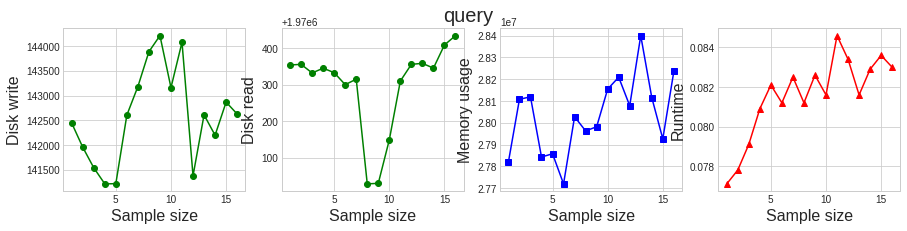

In [10]:
# Querying Plots
plot_resources(multibench_results, sample_sizes, "query")